# A Look at Car Emissions Based on Vehicle Class, Size and Fuel Consumption

### Motivations:

In recent years the transportation industry has been under scrutiny for it's contributions to global warming. In the over-developed nations, we find ourselves in the caveat of relying on vehicles and planes to conduct our daily activities while also mitigating ways to reduce their implications on living beings. To reduce these effects, the integration of hybrid and electric vehicle has begun, however, it will take decades to adapt on a national-global scale. 

In this project, I used a simple dataset found in [kaggle](https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles) to investigate the emission-cost of the types of vehicles that are currently on the road. Intuitively, the outcomes from this project may be general knowledge (bigger cars omit higher levels of emissions) but we are going to apply the machine learning process to see for ourselves if that's true!

### Importing the libraries we need:

In [1]:
from pathlib import Path

import pandas as pd
import numpy as np
import sklearn 
import seaborn as sns 
from cycler import cycler
import matplotlib as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data/CO2 Emissions_Canada.csv')

Let's peep at the data 👀

In [3]:
data.head()

Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4          AS5   
1  ACURA         ILX       COMPACT             2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6          AS6   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                               9.9   
1         Z                              11.2   
2         Z                               6.0   
3         Z                              12.7   
4         Z                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2                              5.8                               5.9   
3                              9.1                              11.1   
4                              8.7                              10.6   

   Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
0                           33                  196  
1                           29                  221  
2                           48                  136  
3                           25                  255  
4                           27                  244

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [5]:
data.describe()

Engine Size(L)    Cylinders  Fuel Consumption City (L/100 km)  \
count     7385.000000  7385.000000                       7385.000000   
mean         3.160068     5.615030                         12.556534   
std          1.354170     1.828307                          3.500274   
min          0.900000     3.000000                          4.200000   
25%          2.000000     4.000000                         10.100000   
50%          3.000000     6.000000                         12.100000   
75%          3.700000     6.000000                         14.600000   
max          8.400000    16.000000                         30.600000   

       Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
count                      7385.000000                       7385.000000   
mean                          9.041706                         10.975071   
std                           2.224456                          2.892506   
min                           4.000000                          4.100000   
25%                           7.500000                          8.900000   
50%                           8.700000                         10.600000   
75%                          10.200000                         12.600000   
max                          20.600000                         26.100000   

       Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
count                  7385.000000          7385.000000  
mean                     27.481652           250.584699  
std                       7.231879            58.512679  
min                      11.000000            96.000000  
25%                      22.000000           208.000000  
50%                      27.000000           246.000000  
75%                      32.000000           288.000000  
max                      69.000000           522.000000

In [6]:
data.nunique(axis=0)

Make                                  42
Model                               2053
Vehicle Class                         16
Engine Size(L)                        51
Cylinders                              8
Transmission                          27
Fuel Type                              5
Fuel Consumption City (L/100 km)     211
Fuel Consumption Hwy (L/100 km)      143
Fuel Consumption Comb (L/100 km)     181
Fuel Consumption Comb (mpg)           54
CO2 Emissions(g/km)                  331
dtype: int64

At first glance, we see that we have a combination of numerical and categorical attributes. We'll probably be selecting a few of the columns to simplify things. We also see that the numerical values vary in range and we'll deal with this later. 

### Setting up a project images folder

A dedicated space to save our visualizations will make it easier for us to access our figures and craft a nice presentation to describe our findings.

In [7]:
IMG_PATH = Path() /'images'
IMG_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMG_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

#source: Ageron handson-ml3

### Looking at the distribution of numerical values:

Distributions helps us understand the spread of the values across each column. We can gain a good understanding of the percentiles and the "center" or most "common" range of certain values. For example, when looking below we can see that most cars in the dataset have a smaller engine than not, and that city fuel consumption fall somewhere between 12 and 15 L/100 km.

In [8]:
num_cols = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 
           'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 
           'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']

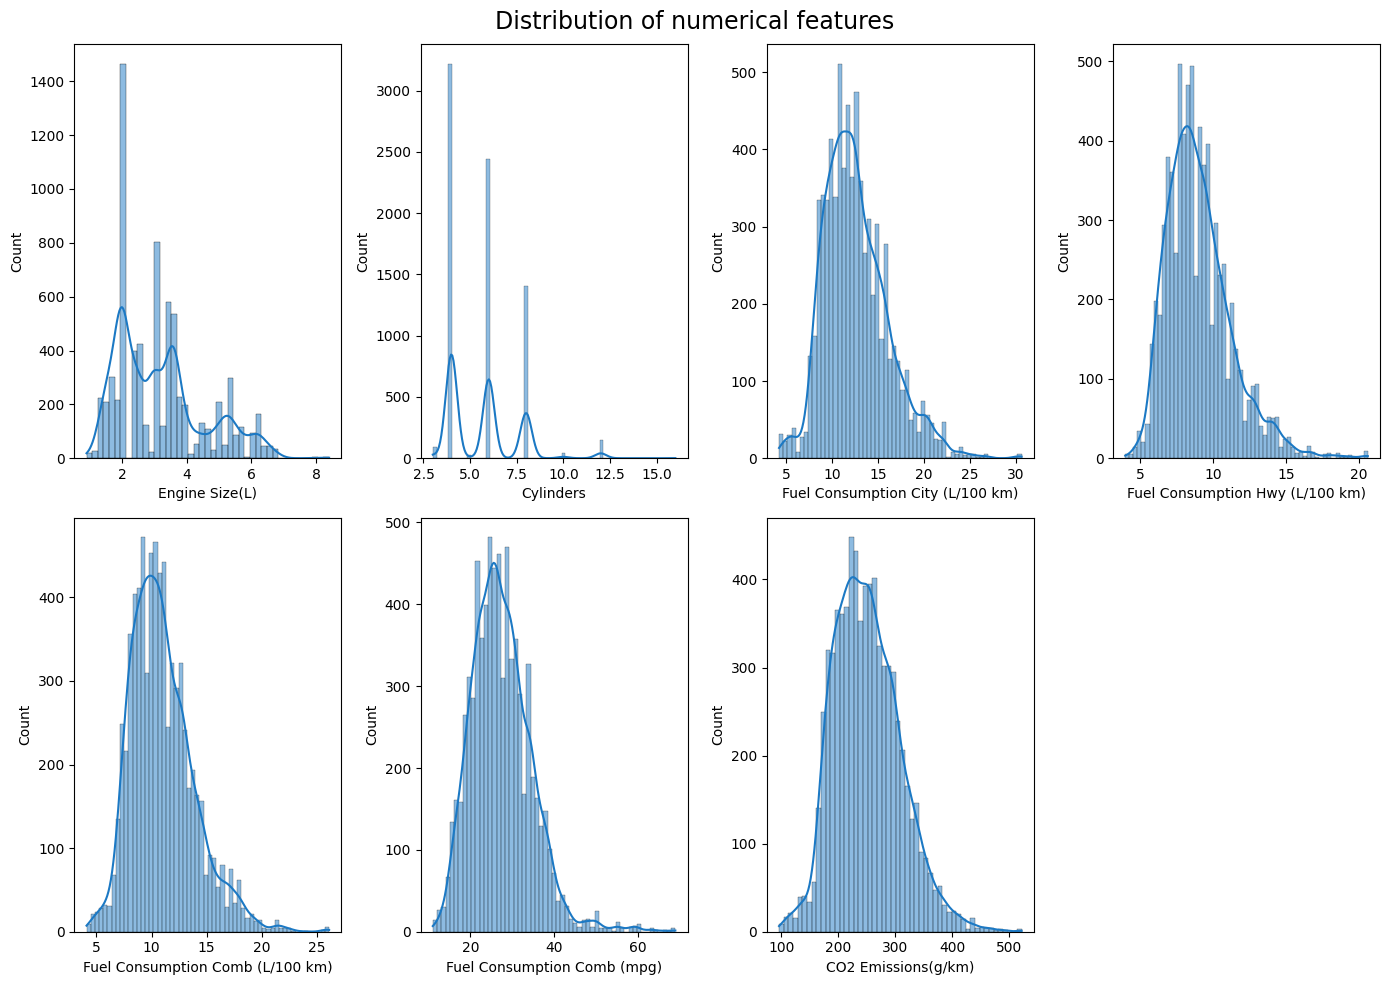

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
plt.suptitle('Distribution of numerical features', fontsize='17')
plt.subplots_adjust(top=0.93, wspace=1)


for i in range(len(num_cols)):
    plt.subplot(2, 4, i+1)
    sns.histplot(x=data[num_cols[i]], kde=True, color='#1C79C4')

save_fig('numeric_features_distplots')
plt.show();

### Exploration of training set

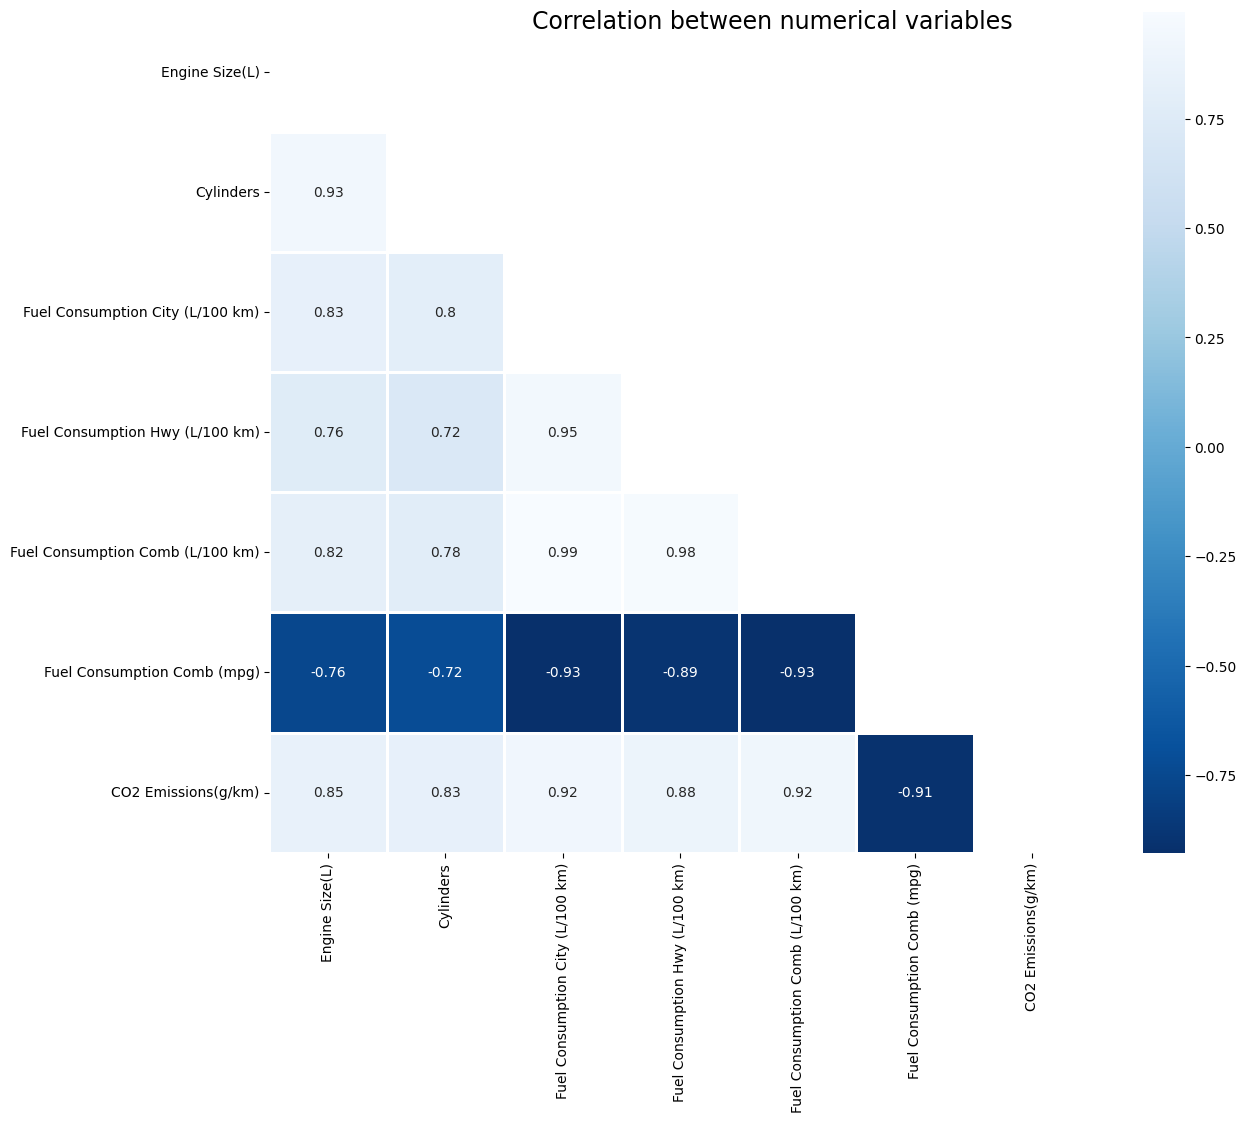

In [10]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
save_fig('variable_correlations')
corr_plot = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True,
           cmap=sns.color_palette("Blues_r",as_cmap=True), mask=mask, cbar=True, 
            linecolor='white', linewidth=2)  ##.set(title='Correlation between numerical variables');
f.suptitle('Correlation between numerical variables', fontsize='17');




In the figure above, let's look at CO2 Emissions correlations on the bottom. It appears that Fuel Consumption City (L/100 km) and Fuel Consumption Comb (L/100 km) are the most correlated with CO2 emissions at 0.92. 

Let's take it a step forward and look at the strongest correlations for Fuel Consumption City (L/100 km) and Fuel Consumption Comb (L/100 km). Doing this we can see that Engine Size(L) is actually the strongest correlation for both at 0.83. 

Let's keep unraveling the onion and take a look at Engine Size(L) and we find that its strongest correlation is Cylinders 0.93. Looking at Cylinders, we see that the strongest correlation is CO2 Emissions (g/km) at 0.83 followed by Fuel Consumption City (L/100 km).

A car is a unified structure, the correlations between features make sense when we think about how all the different parts work. Our goal with breaking down correlations is to try to make sense of the different features even when it's not as straightforward as a car. This simple correlation matrix can help us make sense of our data!

Another thing, keeping Fuel Consumption City (L/100 km) and Fuel Consumption Comb (L/100 km) seems redundant so we will most likely not use all of the fuel comsumption variations for our model.

In [11]:
corr_features = data.rename(columns={'Engine Size(L)': 'Engine Size', 
                                     'Fuel Consumption Comb (L/100 km)': 'Fuel Consumption Comb', 
                                     'Fuel Consumption City (L/100 km)': 'Fuel Consumption City', 
                                     'Fuel Consumption Hwy (L/100 km)': 'Fuel Consumption Hwy', 
                                     'CO2 Emissions(g/km)': 'CO2 Emissions' })



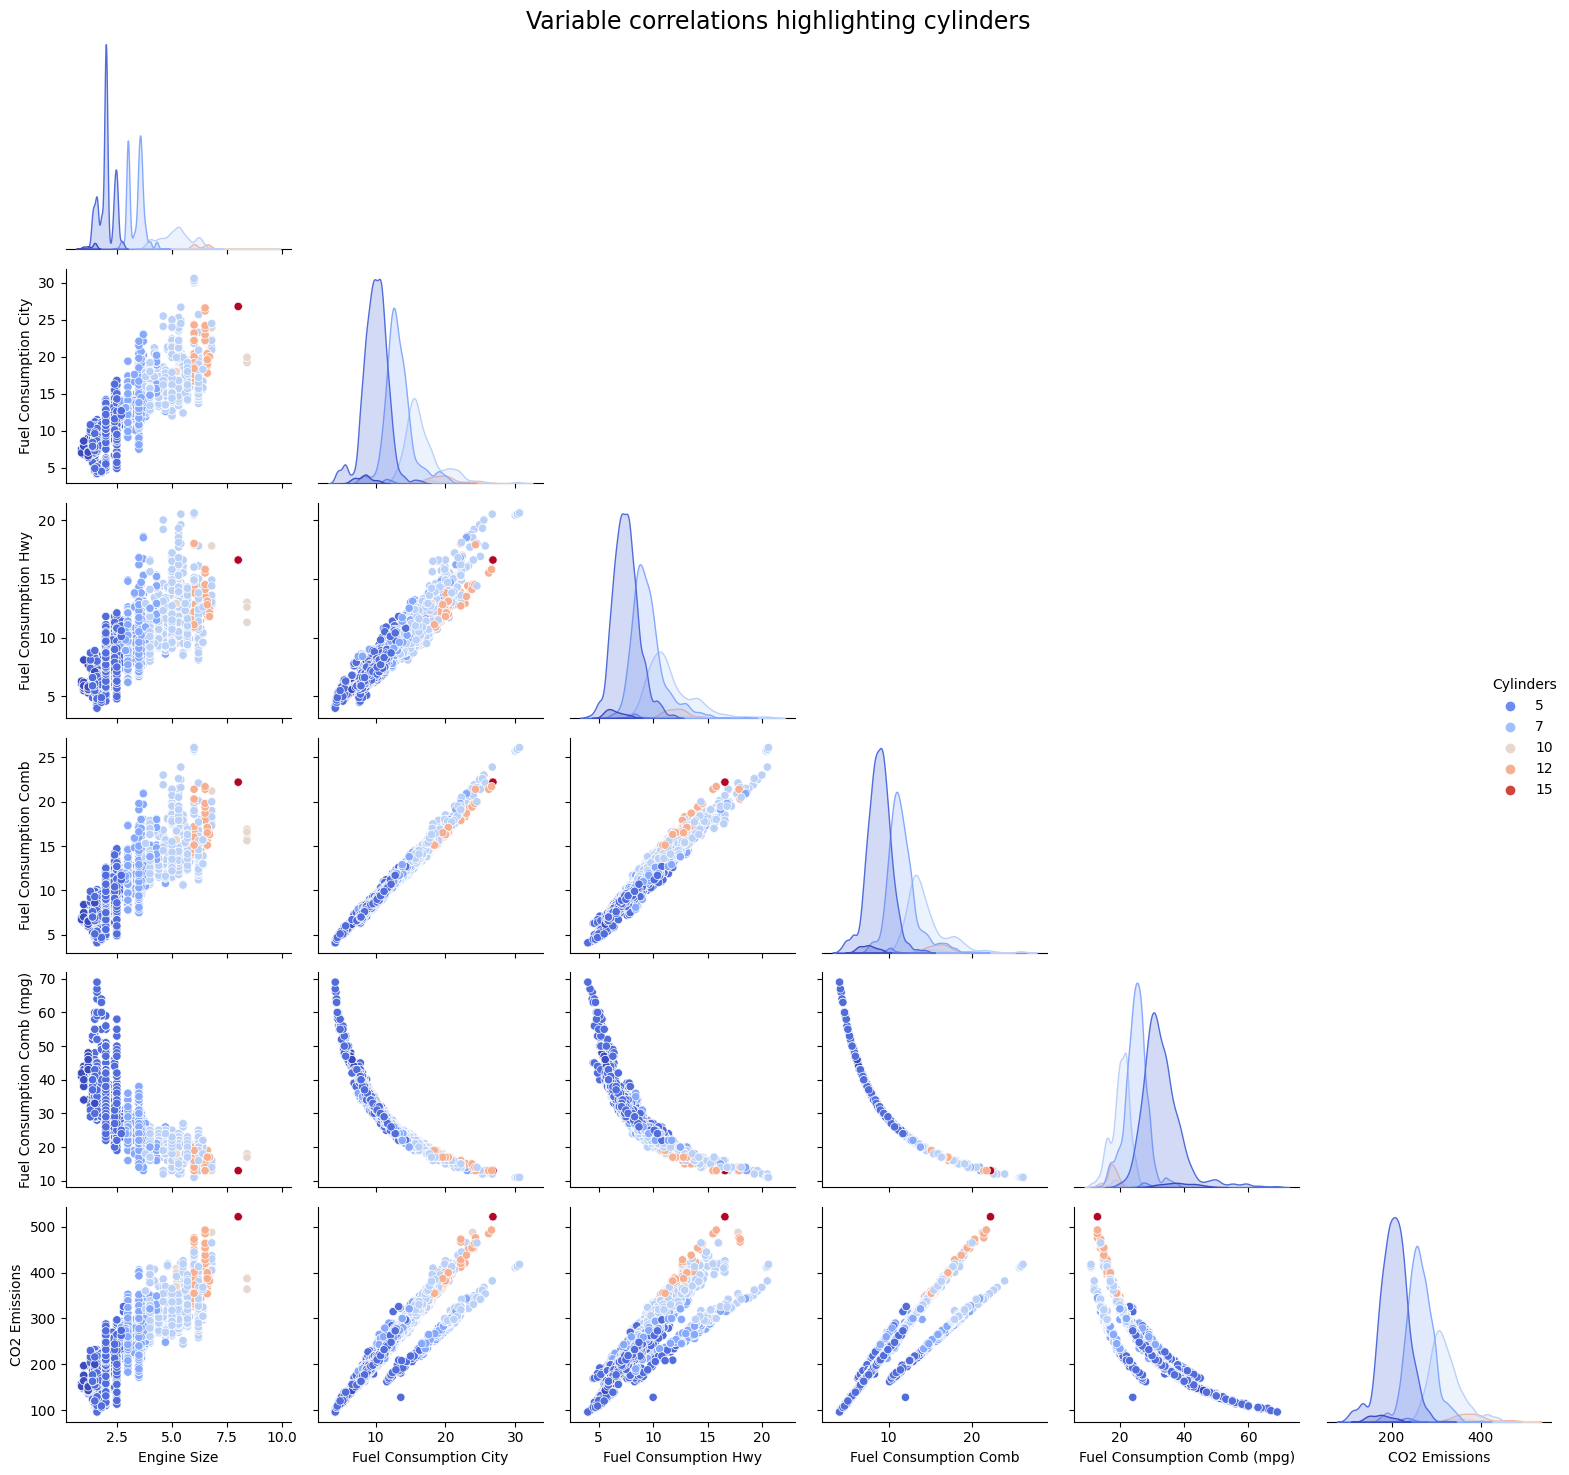

In [12]:
datapplot = sns.pairplot(corr_features, hue='Cylinders', corner=True, palette='coolwarm')
datapplot.fig.suptitle('Variable correlations highlighting cylinders', fontsize='17');
save_fig('scatter_plot_cylinder_highlight')



The ggplot above provides a similar insight into the correlations while also depicting the range of values for each column. The Cylinders key help us solidy what we found in the figure before this one; the higher the Cylinder, the higher the CO2 Emissions and less Cylinders, the lower fuel consumption.

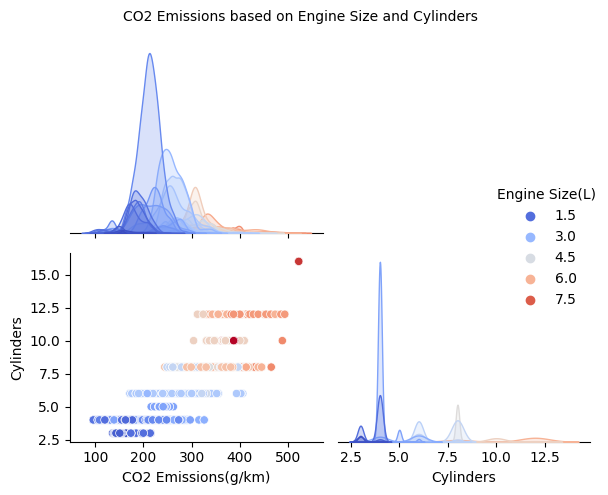

In [13]:
#Engine size information
engn = ['Engine Size(L)','CO2 Emissions(g/km)', 'Cylinders']

# print(data[engn])
engn_data = sns.pairplot(data[engn], hue='Engine Size(L)', corner=True, palette='coolwarm')
engn_data.fig.suptitle('CO2 Emissions based on Engine Size and Cylinders', fontsize='10');
save_fig('Scatter_plot_engine_size_CO2')

In the figure above, we hone in on our findings. This figure paints a clearer picture on the relationship between Cylinders and CO2 Emissions.

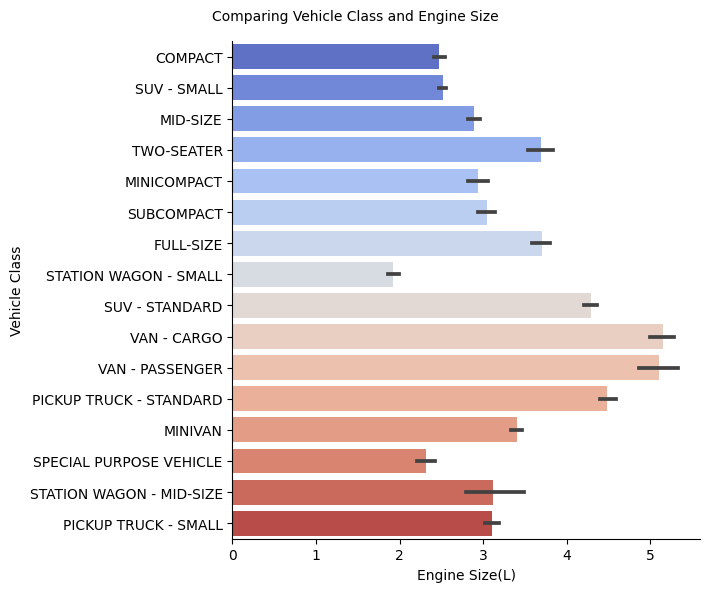

In [14]:
cat_plot = sns.catplot(data=data, x='Engine Size(L)', y='Vehicle Class', kind='bar', palette='coolwarm', height=6, aspect=1.2)
cat_plot.fig.suptitle('Comparing Vehicle Class and Engine Size', fontsize='10')
plt.subplots_adjust(top=0.93, wspace=1);
save_fig('Vehicle_class_and_Engine_Size')



From this figure, we can the relationship between 'Vehicle Class' and 'Engine Size(L)'. The larger engines fall under the Vans-Cargo, Vans-Passenger, 'Pickup Truck-Standard', and 'SUV-standard'.

# Can we predict the CO2 Emissions of a vehicle based on the engine size, cylinders, vehicle class and fuel consumption? 

### Creating pipelines for model experimentation

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
%matplotlib inline



Dropping the dependent variable from the dataframe:

In [16]:
X = data.drop(['CO2 Emissions(g/km)'], axis=1)
y = data['CO2 Emissions(g/km)']

In [17]:
num_features = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (L/100 km)']
cat_features = ['Vehicle Class']

Creating transformers and data pipelines:

In [18]:
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('imputer', SimpleImputer(strategy='median'))
])

In [19]:
cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

In [20]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

Selecting Linear Regression Model:

In [21]:
linear_regression = LinearRegression(fit_intercept=True)

In [22]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', linear_regression)
])

### Creating train/test set 

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting and testing Linear Regression Model

In [24]:
print(pipeline.fit(X_train, y_train))

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Engine Size(L)',
                                                   'Cylinders',
                                                   'Fuel Consumption Comb '
                                                   '(L/100 km)']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Vehicle Class'])

### Predicting the outputs

In [25]:
y_pred = pipeline.predict(X_test)

In [26]:
y_pred

array([246.42600775, 322.44951128, 320.01399361, ..., 187.61551055,
       239.38312313, 193.57340287])

Evaluating model's performance:

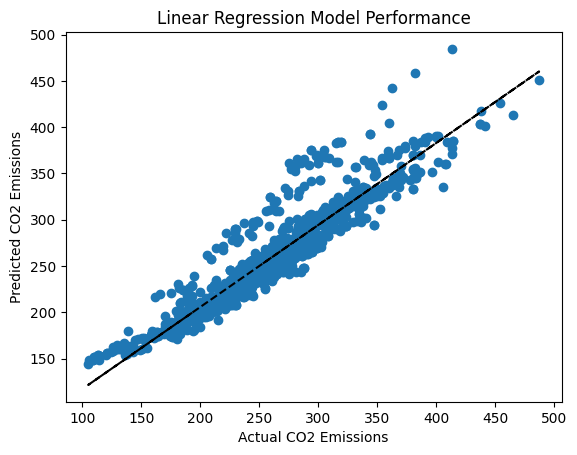

In [27]:
coef = np.polyfit(y_test, y_pred, 1)
poly1d_fn = np.poly1d(coef)
plt.plot(y_test, y_pred, 'o', y_test, poly1d_fn(y_test), '--k')
plt.xlabel("Actual CO2 Emissions")
plt.ylabel("Predicted CO2 Emissions")
plt.title("Linear Regression Model Performance")
plt.show()

In [28]:
score = pipeline.score(X_test, y_test)
print('R^2 Score:', score)

R^2 Score: 0.8891225716107154


In [29]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(mse)

381.37704234076597


In [30]:
print('Linear Regression MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('Linear Regression MSE:',metrics.mean_squared_error(y_test,y_pred))
print('Linear Regression RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Linear Regression MAE: 13.111923049997554
Linear Regression MSE: 381.37704234076597
Linear Regression RMSE: 19.528877139783688


# Fine Tuning our model:

## Using GridSearch to find best features

In [31]:
param_grid = {
    'regressor__fit_intercept': [True, False],
}

In [32]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)

In [33]:
print(grid_search.fit(X_train, y_train))

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler()),
                                                                                         ('imputer',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         ['Engine '
                                                                          'Size(L)',
                                                                          'Cylinders',
                                                                          'Fuel '
                                                                      

In [34]:
best_params = grid_search.best_params_

In [35]:
best_params

{'regressor__fit_intercept': False}

In [36]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'regressor__fit_intercept': False}
Best score: 0.89


In [37]:
importance = linear_regression.coef_
importance

array([  6.98197453,  15.24542426,  34.56587301,  -6.1674052 ,
        -7.38701255,  -8.62114732,  -5.13963442,  -4.34647694,
        24.56576341,  -3.95804396,   5.42455064,  -3.333075  ,
        -4.25666589,  -0.65401025,   4.29657028,   3.15783528,
         2.55451568, -16.51903563,  20.38327187])

In conclusion, our linear model performed fairly well predicting 'CO2 Emissions' output from the given features: 'Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (L/100 km)' and
'Vehicle Class'. 

Some of the ways that this project can be improved or developed further is to use further evaluate the differences of of the CO2 Emissions based on fuel type, or doing more defined feature selection for the model.